# FUNDATEC
# Práctica Minería de Datos
### Introducción a la Minería de Datos
### Estudiante: Oscar Vidal Ruiz Zamora
### Profesor: Johannes Segura
### Marzo 2024

### Paso #1: Importación de Librerías

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

/var/folders/wy/533k_fr578dd3znq2w98m5tm0000gn/T/ipykernel_4980/819901073.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Paso #2: Lectura de los Datos
#### Para referencia se puede encontrar en https://www.kaggle.com/datasets/jahnveenarang/cvdcvd-vd?resource=download.

In [2]:
os.chdir('/Users/ozz/Documents/Modulo5_MineriaD/PracticaEDA//')
os.getcwd()

'/Users/ozz/Documents/Modulo5_MineriaD/PracticaEDA'

In [3]:
SocNetAds = pd.read_csv('Social_Network_Ads.csv')

SocNetAds 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
SocNetAds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Paso 3 Reducción de Datos, Paso 4 Ingeniería de Componentes y Paso 5 Limpieza Datos  (Data Cleansing / Data Mashup / Data Wrangling)


In [5]:
SocNetAds.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
unique_count_UserID = SocNetAds['User ID'].nunique()

unique_count_UserID

400

## Paso 6 Sumarizacion Estadistica

In [13]:
SocNetAds.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [14]:
SocNetAds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User ID,400.0,NaN,NaN,NaN,15691539.7575,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Gender,400,2,Female,204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,400.0,NaN,NaN,NaN,37.655,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,NaN,NaN,NaN,69742.5,34096.960282,15000.0,43000.0,70000.0,88000.0,150000.0
Purchased,400.0,NaN,NaN,NaN,0.3575,0.479864,0.0,0.0,0.0,1.0,1.0


#### Índice de Masculinidad

#### Para saber la proporción de hombres y de mujeres.

In [15]:
NumMales = len(SocNetAds[SocNetAds['Gender'] == 'Male'])
NumFemales = len(SocNetAds[SocNetAds['Gender'] == 'Female'])

In [17]:
NumMales

196

In [18]:
NumFemales

204

In [21]:
PropMale = (NumMales / (NumMales+NumFemales)) * 100
print("Porcentaje de hombres: {:.0f}%".format(PropMale))

Porcentaje de hombres: 49%


In [33]:
PropFemale = (NumFemales / (NumMales+NumFemales)) * 100
print("Porcentaje de Mujeres: {:.0f}%".format(PropFemale))

Porcentaje de Mujeres: 51%


#### Proporcion de personas que compraron y no compraron por género


In [35]:
Malebuyers = len(SocNetAds[(SocNetAds['Gender'] == 'Male') & (SocNetAds['Purchased'] == 1)])

Malebuyers

66

In [36]:
PropMaleBuyers = (Malebuyers/NumMales)*100

print("Porcentaje de hombres compradores: {:.0f}%".format(PropMaleBuyers))

Porcentaje de hombres compradores: 34%


In [37]:
Femalebuyers = len(SocNetAds[(SocNetAds['Gender'] == 'Female') & (SocNetAds['Purchased'] == 1)])

Femalebuyers

77

In [38]:
PropFemaleBuyers = (Femalebuyers/NumFemales)*100

print("Porcentaje de mujeres compradores: {:.0f}%".format(PropFemaleBuyers))

Porcentaje de mujeres compradores: 38%


In [39]:
Total_Compradores = (Malebuyers+Femalebuyers)

Total_Compradores

143

In [42]:
Prop_Total_Compradores = ((Total_Compradores/(NumMales+NumFemales))*100)

print("Porcentaje de total de compradores: {:.0f}%".format(Prop_Total_Compradores))

Porcentaje de total de compradores: 36%


#### Promedio Salarial y por edad de compradores

In [44]:
Compradores = SocNetAds[SocNetAds['Purchased']==1]

Compradores

,User ID,Gender,Age,EstimatedSalary,Purchased
7,15694829,Female,32,150000,1
16,15733883,Male,47,25000,1
17,15617482,Male,45,26000,1
18,15704583,Male,46,28000,1
19,15621083,Female,48,29000,1
...,...,...,...,...,...
393,15635893,Male,60,42000,1
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1


In [47]:
MeanBuyersSal = Compradores['EstimatedSalary'].mean()

MeanBuyersSal

86272.72727272728

In [49]:
Compradores.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User ID,143.0,NaN,NaN,NaN,15692222.902098,71128.514008,15569641.0,15630449.0,15694829.0,15749718.5,15815236.0
Gender,143,2,Female,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,143.0,NaN,NaN,NaN,46.391608,8.612172,27.0,39.5,47.0,53.0,60.0
EstimatedSalary,143.0,NaN,NaN,NaN,86272.727273,42064.200064,20000.0,41000.0,90000.0,122500.0,150000.0
Purchased,143.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0


## Paso 7 EDA Analisis Univariados

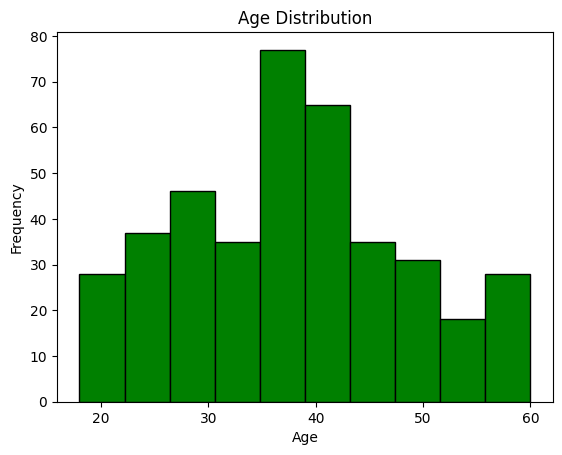

In [57]:
plt.hist(SocNetAds['Age'], bins=10, color='green', edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

plt.show()

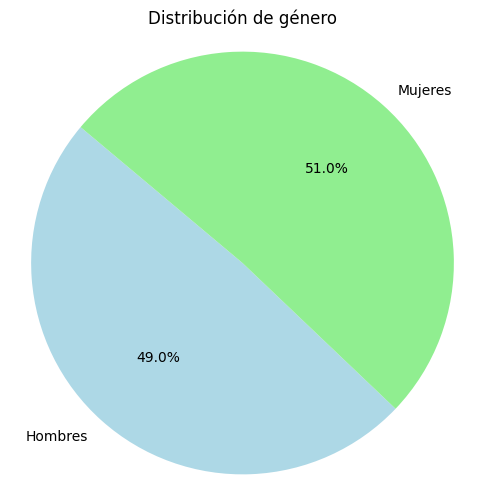

In [61]:
plt.figure(figsize=(6, 6))
plt.pie([NumMales, NumFemales], labels=['Hombres','Mujeres'], colors=['lightblue','lightgreen'], autopct='%1.1f%%', startangle=140)
plt.title('Distribución de género')
plt.axis('equal')
plt.show()

In [63]:
num_cols = SocNetAds.select_dtypes(include=np.number).columns.tolist()

print(num_cols)

['User ID', 'Age', 'EstimatedSalary', 'Purchased']


User ID
Skew : -0.03


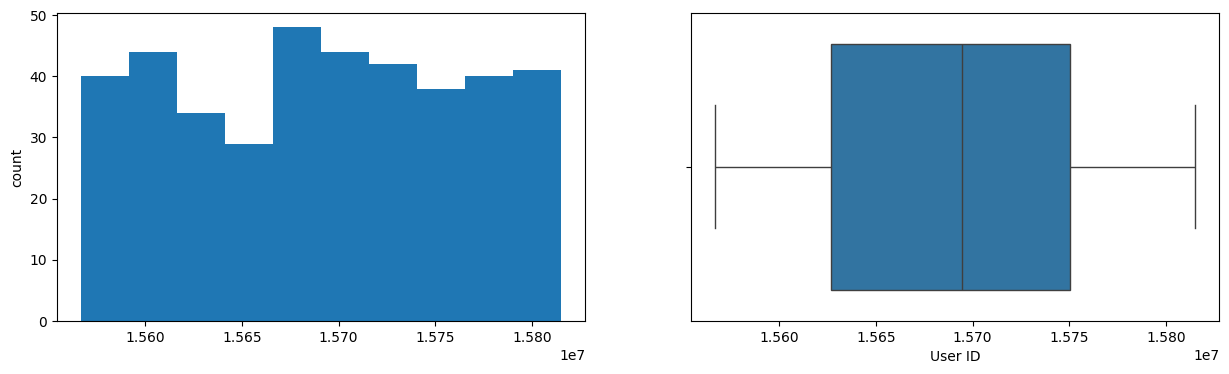

Age
Skew : 0.23


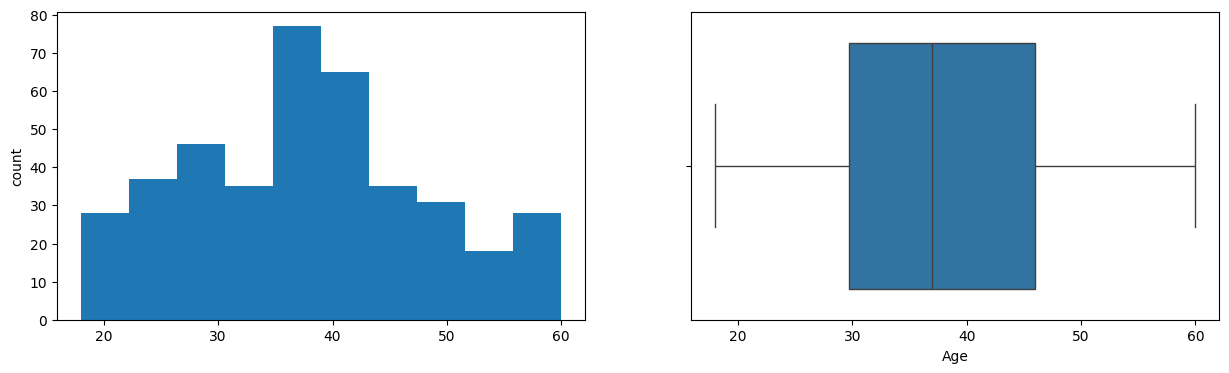

EstimatedSalary
Skew : 0.5


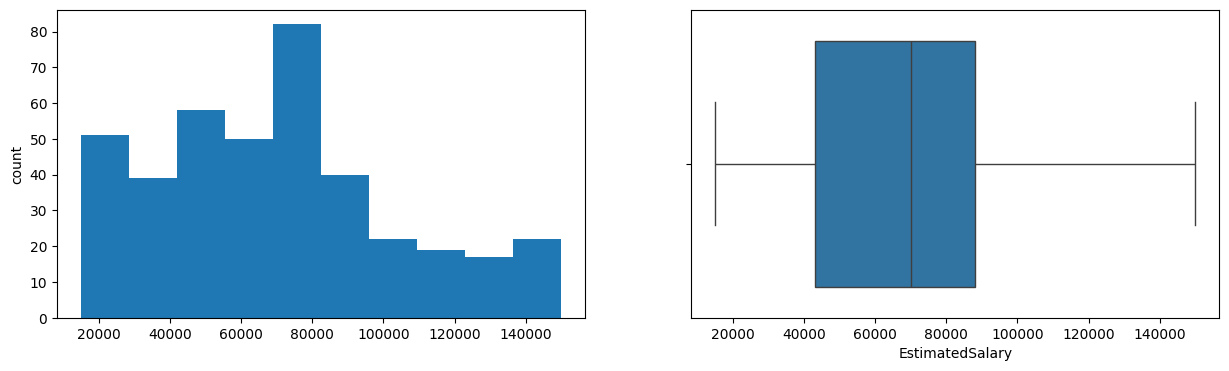

Purchased
Skew : 0.6


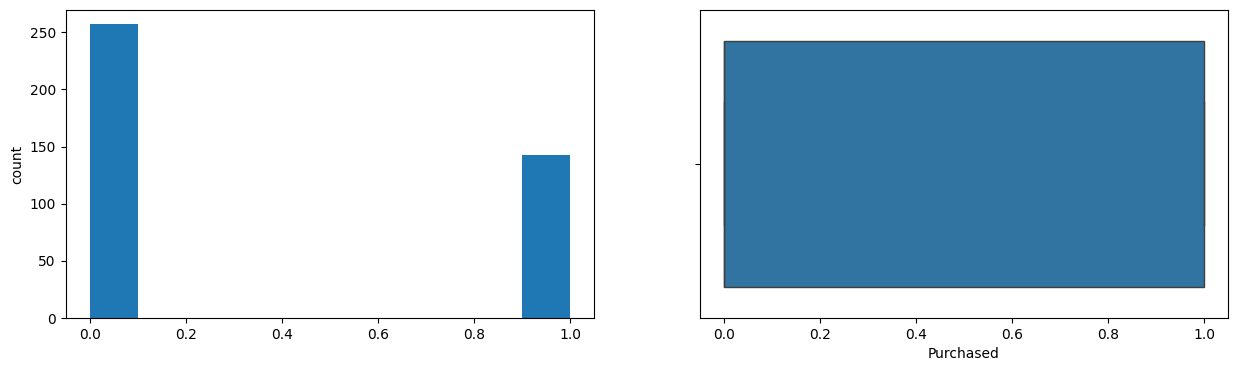

In [65]:
for col in num_cols:
    print(col)
    print('Skew :', round(SocNetAds[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    SocNetAds[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=SocNetAds[col])
    plt.show()

## Paso 8 Data Transformation

In [71]:
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [72]:
log_transform(SocNetAds,['Age', 'EstimatedSalary', 'Purchased'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User ID              400 non-null    int64  
 1   Gender               400 non-null    object 
 2   Age                  400 non-null    int64  
 3   EstimatedSalary      400 non-null    int64  
 4   Purchased            400 non-null    int64  
 5   Age_log              400 non-null    float64
 6   EstimatedSalary_log  400 non-null    float64
 7   Purchased_log        400 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 25.1+ KB


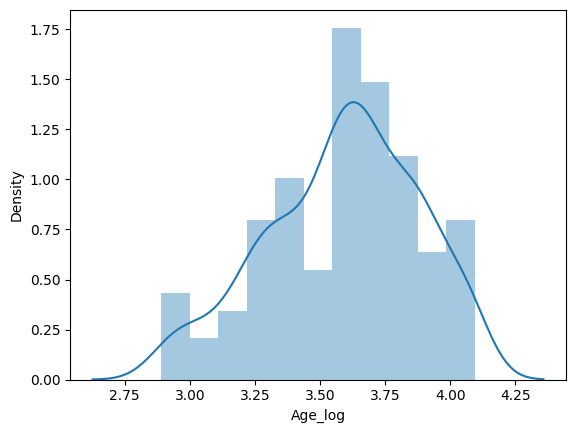

In [73]:
sns.distplot(SocNetAds["Age_log"], axlabel="Age_log");

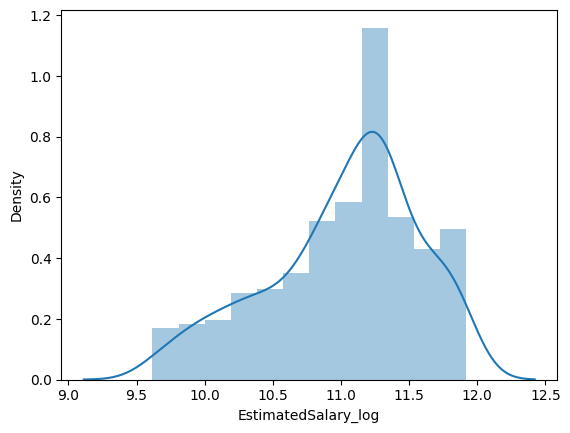

In [74]:
sns.distplot(SocNetAds["EstimatedSalary_log"], axlabel="EstimatedSalary_log");

## Paso 9 Análisis Bivariado

<Figure size 1300x1700 with 0 Axes>

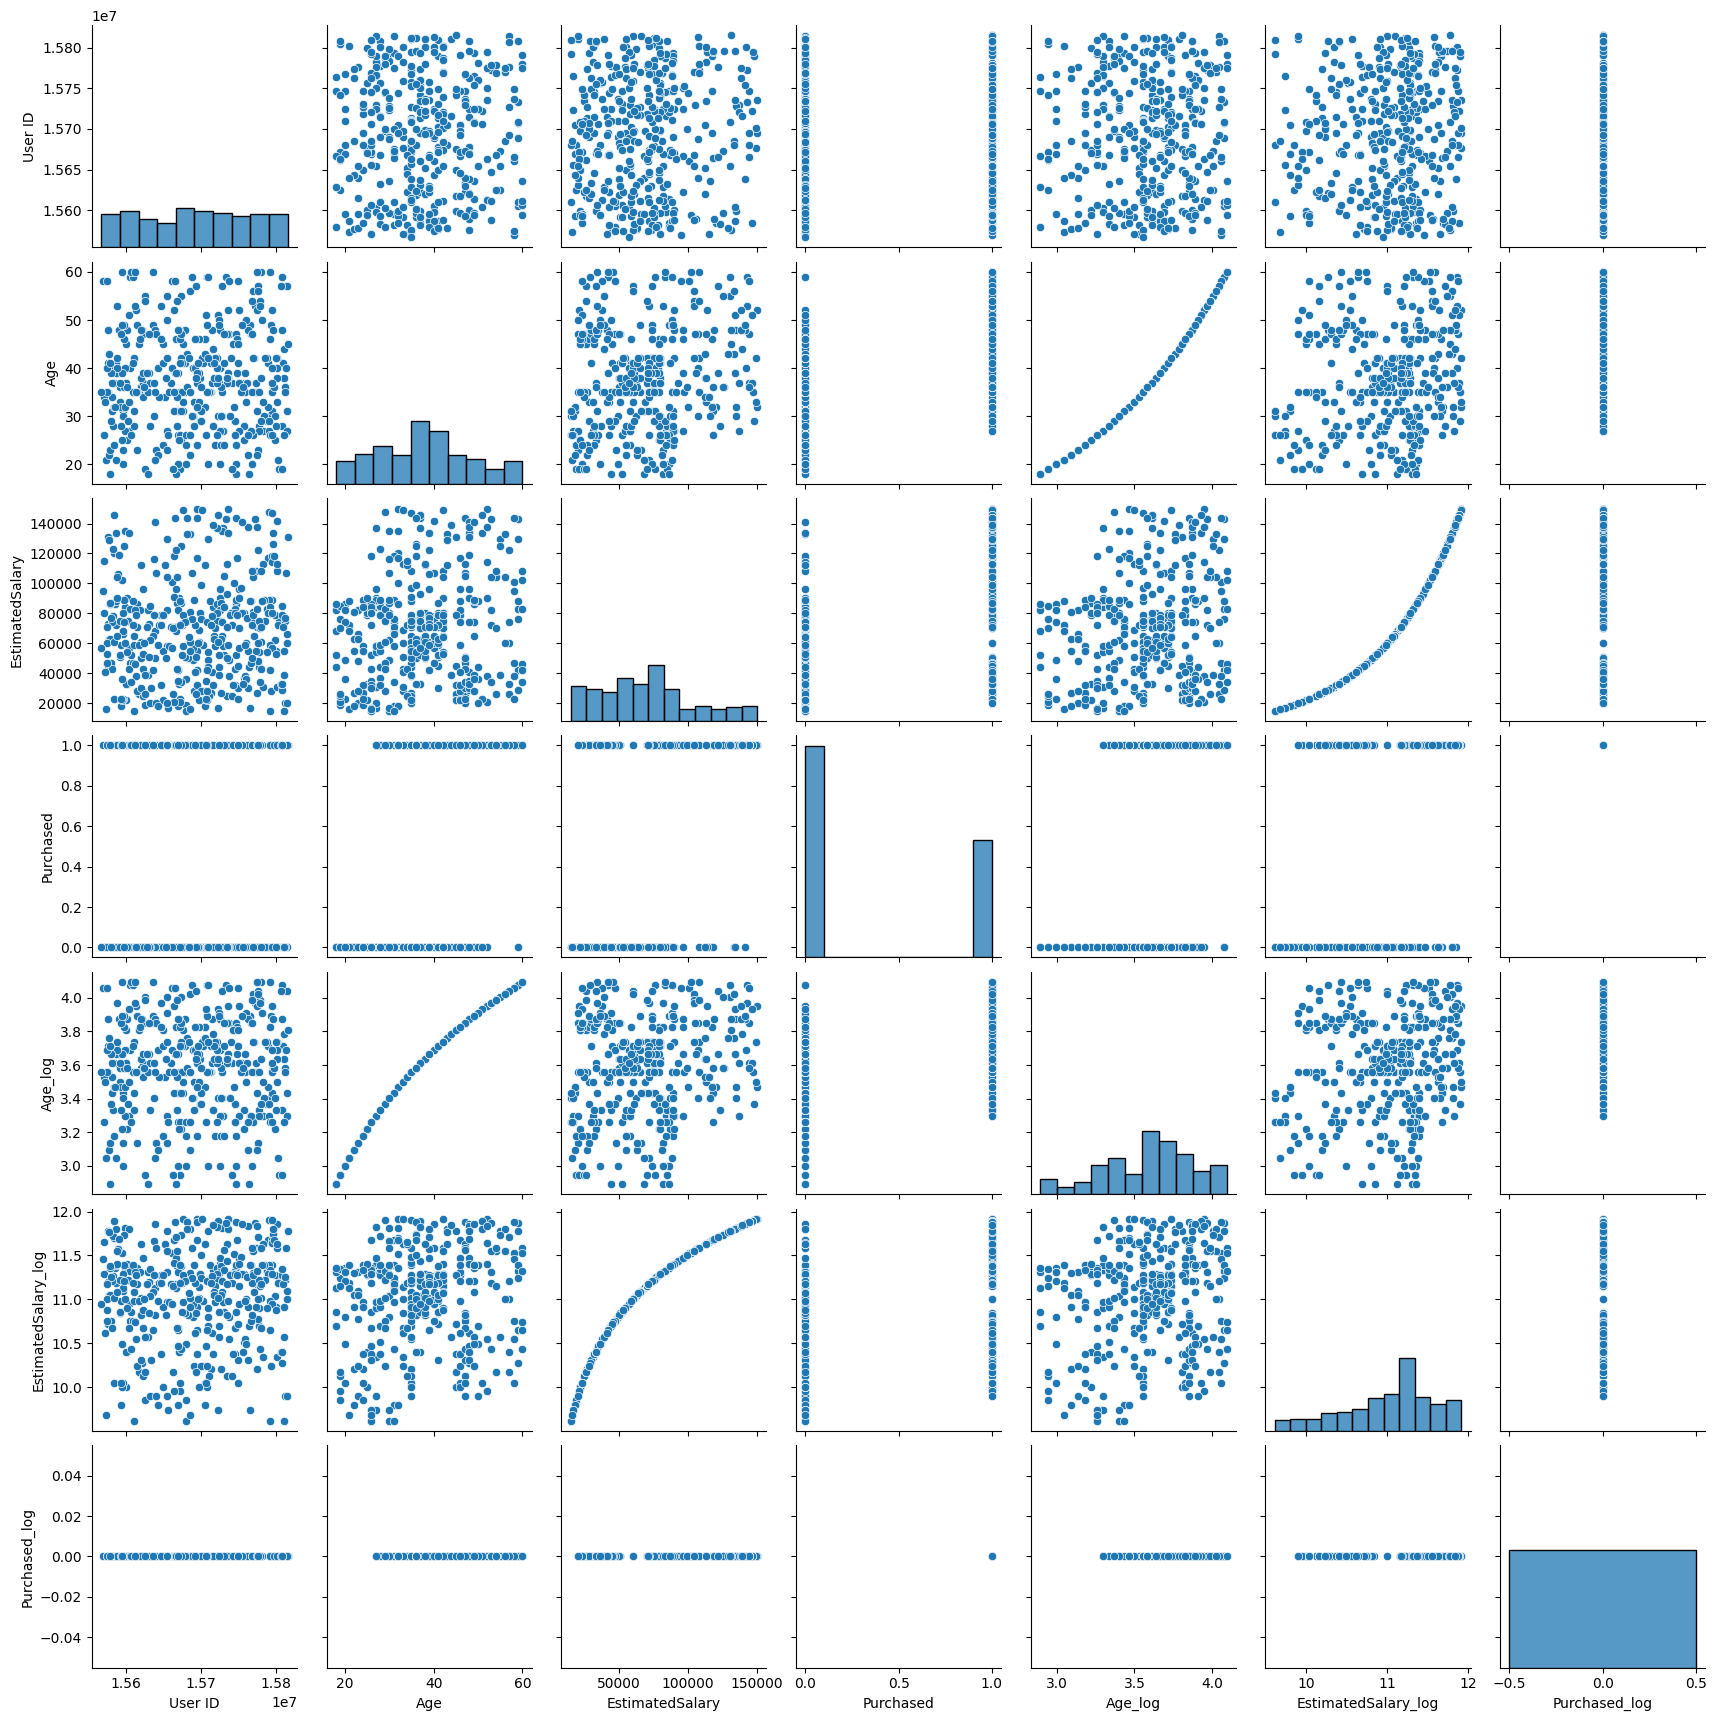

In [76]:
plt.figure(figsize=(13,17))
sns.pairplot(SocNetAds)
plt.show()

## Paso 10 EDA Analisis Multivariado

In [135]:
ColumnasCorrelacion = ['Age', 'EstimatedSalary','Purchased']

SeleccionColumnas = SocNetAds[ColumnasCorrelacion]

In [136]:
Matriz_Correlacion = SeleccionColumnas.corr()

Matriz_Correlacion

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


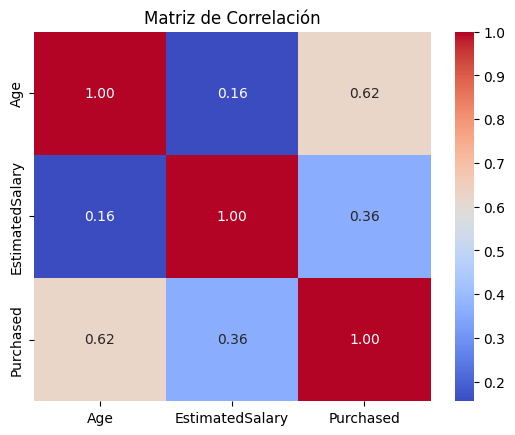

In [137]:
sns.heatmap(Matriz_Correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

## Creacion de un modelo de regresion logistica

### Funcion logistica standard

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [100]:
Age = SocNetAds['Age'].tolist()

Age

[19,
 35,
 26,
 27,
 19,
 27,
 27,
 32,
 25,
 35,
 26,
 26,
 20,
 32,
 18,
 29,
 47,
 45,
 46,
 48,
 45,
 47,
 48,
 45,
 46,
 47,
 49,
 47,
 29,
 31,
 31,
 27,
 21,
 28,
 27,
 35,
 33,
 30,
 26,
 27,
 27,
 33,
 35,
 30,
 28,
 23,
 25,
 27,
 30,
 31,
 24,
 18,
 29,
 35,
 27,
 24,
 23,
 28,
 22,
 32,
 27,
 25,
 23,
 32,
 59,
 24,
 24,
 23,
 22,
 31,
 25,
 24,
 20,
 33,
 32,
 34,
 18,
 22,
 28,
 26,
 30,
 39,
 20,
 35,
 30,
 31,
 24,
 28,
 26,
 35,
 22,
 30,
 26,
 29,
 29,
 35,
 35,
 28,
 35,
 28,
 27,
 28,
 32,
 33,
 19,
 21,
 26,
 27,
 26,
 38,
 39,
 37,
 38,
 37,
 42,
 40,
 35,
 36,
 40,
 41,
 36,
 37,
 40,
 35,
 41,
 39,
 42,
 26,
 30,
 26,
 31,
 33,
 30,
 21,
 28,
 23,
 20,
 30,
 28,
 19,
 19,
 18,
 35,
 30,
 34,
 24,
 27,
 41,
 29,
 20,
 26,
 41,
 31,
 36,
 40,
 31,
 46,
 29,
 26,
 32,
 32,
 25,
 37,
 35,
 33,
 18,
 22,
 35,
 29,
 29,
 21,
 34,
 26,
 34,
 34,
 23,
 35,
 25,
 24,
 31,
 26,
 31,
 32,
 33,
 33,
 31,
 20,
 33,
 35,
 28,
 24,
 19,
 29,
 19,
 28,
 34,
 30,
 20,
 26,
 35,


In [142]:
Age_array = np.array(Age)

Age_reshaped = Age_array.reshape(-1, 1)

In [143]:
Age_reshaped

array([[19],
       [35],
       [26],
       [27],
       [19],
       [27],
       [27],
       [32],
       [25],
       [35],
       [26],
       [26],
       [20],
       [32],
       [18],
       [29],
       [47],
       [45],
       [46],
       [48],
       [45],
       [47],
       [48],
       [45],
       [46],
       [47],
       [49],
       [47],
       [29],
       [31],
       [31],
       [27],
       [21],
       [28],
       [27],
       [35],
       [33],
       [30],
       [26],
       [27],
       [27],
       [33],
       [35],
       [30],
       [28],
       [23],
       [25],
       [27],
       [30],
       [31],
       [24],
       [18],
       [29],
       [35],
       [27],
       [24],
       [23],
       [28],
       [22],
       [32],
       [27],
       [25],
       [23],
       [32],
       [59],
       [24],
       [24],
       [23],
       [22],
       [31],
       [25],
       [24],
       [20],
       [33],
       [32],
       [34],
       [18],

In [144]:
Purchased = SocNetAds['Purchased'].tolist()

Purchased

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,


In [154]:
datos_entrena, datos_prueba, clicks_entrena, clicks_prueba = train_test_split(Age_reshaped,Purchased, test_size=0.30)

In [155]:
modelo = LogisticRegression().fit(datos_entrena, clicks_entrena)

In [156]:
type(modelo)

sklearn.linear_model._logistic.LogisticRegression

In [157]:
datos_prueba

array([[52],
       [26],
       [35],
       [36],
       [24],
       [35],
       [21],
       [36],
       [33],
       [20],
       [38],
       [56],
       [50],
       [25],
       [35],
       [20],
       [26],
       [26],
       [35],
       [37],
       [33],
       [28],
       [37],
       [57],
       [25],
       [45],
       [40],
       [47],
       [40],
       [23],
       [25],
       [47],
       [41],
       [58],
       [54],
       [41],
       [42],
       [42],
       [35],
       [54],
       [47],
       [60],
       [19],
       [29],
       [48],
       [27],
       [30],
       [38],
       [41],
       [30],
       [42],
       [19],
       [22],
       [26],
       [35],
       [28],
       [50],
       [46],
       [42],
       [39],
       [36],
       [21],
       [31],
       [24],
       [52],
       [38],
       [57],
       [35],
       [49],
       [40],
       [46],
       [42],
       [36],
       [31],
       [48],
       [36],
       [27],

In [158]:
np.set_printoptions(suppress=True)
print(modelo.predict(datos_prueba))

[1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0
 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0
 1 1 1 1 0 0 0 0 1]


In [159]:
print(clase_prueba)

[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


#### En la siguiente línea se puede ver la probabilidad de cada uno de los datos para una edad de 55 años la probabilidad es de 13% de no compra y de compra de 87%.

In [160]:
print(modelo.predict_proba(datos_prueba))

[[0.13260173 0.86739827]
 [0.96075317 0.03924683]
 [0.80857411 0.19142589]
 [0.77652704 0.22347296]
 [0.97309862 0.02690138]
 [0.80857411 0.19142589]
 [0.9848427  0.0151573 ]
 [0.77652704 0.22347296]
 [0.86190852 0.13809148]
 [0.98749731 0.01250269]
 [0.70163168 0.29836832]
 [0.06543216 0.93456784]
 [0.18426916 0.81573084]
 [0.96748748 0.03251252]
 [0.80857411 0.19142589]
 [0.98749731 0.01250269]
 [0.96075317 0.03924683]
 [0.96075317 0.03924683]
 [0.80857411 0.19142589]
 [0.74083452 0.25916548]
 [0.86190852 0.13809148]
 [0.94307363 0.05692637]
 [0.74083452 0.25916548]
 [0.05445942 0.94554058]
 [0.96748748 0.03251252]
 [0.37483397 0.62516603]
 [0.6141093  0.3858907 ]
 [0.28864065 0.71135935]
 [0.6141093  0.3858907 ]
 [0.97776363 0.02223637]
 [0.96748748 0.03251252]
 [0.28864065 0.71135935]
 [0.5669427  0.4330573 ]
 [0.0452377  0.9547623 ]
 [0.09375631 0.90624369]
 [0.5669427  0.4330573 ]
 [0.51853092 0.48146908]
 [0.51853092 0.48146908]
 [0.80857411 0.19142589]
 [0.09375631 0.90624369]


#### El score de aciertos para este set específico de datos sería de 60%. Los datos de pruba son escogidos aleatoriamente por lo que si se recalcula puede que de otros valores. 

In [161]:
print(modelo.score(datos_prueba, clase_prueba))

0.6


#### Para saber el interceptp y la pendiente con la que se entrenó el modelo se usa el siguiente código:

In [162]:
print(modelo.intercept_, modelo.coef_)

[-8.27384164] [[0.19523057]]
